In [7]:
#@title 1.a choose pypulseq example seq files (first call generates them)
import numpy as np
# newer numpy versions don't contain this, but pypulseq still relies on it
np.int = int
np.float = float
np.complex = complex

# Only build some for faster doc build, you can uncomment all
# from pypulseq.seq_examples.scripts import write_epi
# from pypulseq.seq_examples.scripts import write_epi_se
# from pypulseq.seq_examples.scripts import write_epi_se_rs
from pypulseq.seq_examples.scripts import write_gre
# from pypulseq.seq_examples.scripts import write_gre_label
# from pypulseq.seq_examples.scripts import write_haste
# from pypulseq.seq_examples.scripts import write_tse
# from pypulseq.seq_examples.scripts import write_ute

#@title choose pypulseq example
# seq_file = "epi_pypulseq.seq"
seq_file = r"C:\Users\perez\Desktop\masters\mri_research\code\python\mrf-masters\research_sequences_from_scratch\epi\epi_with_acceleration_and_half_fourier\epi_pypulseq_acceleration_R_1_half_fourier_False.seq"

load phantom
VoxelGridPhantom
size = tensor([0.2000, 0.2000, 0.0080])


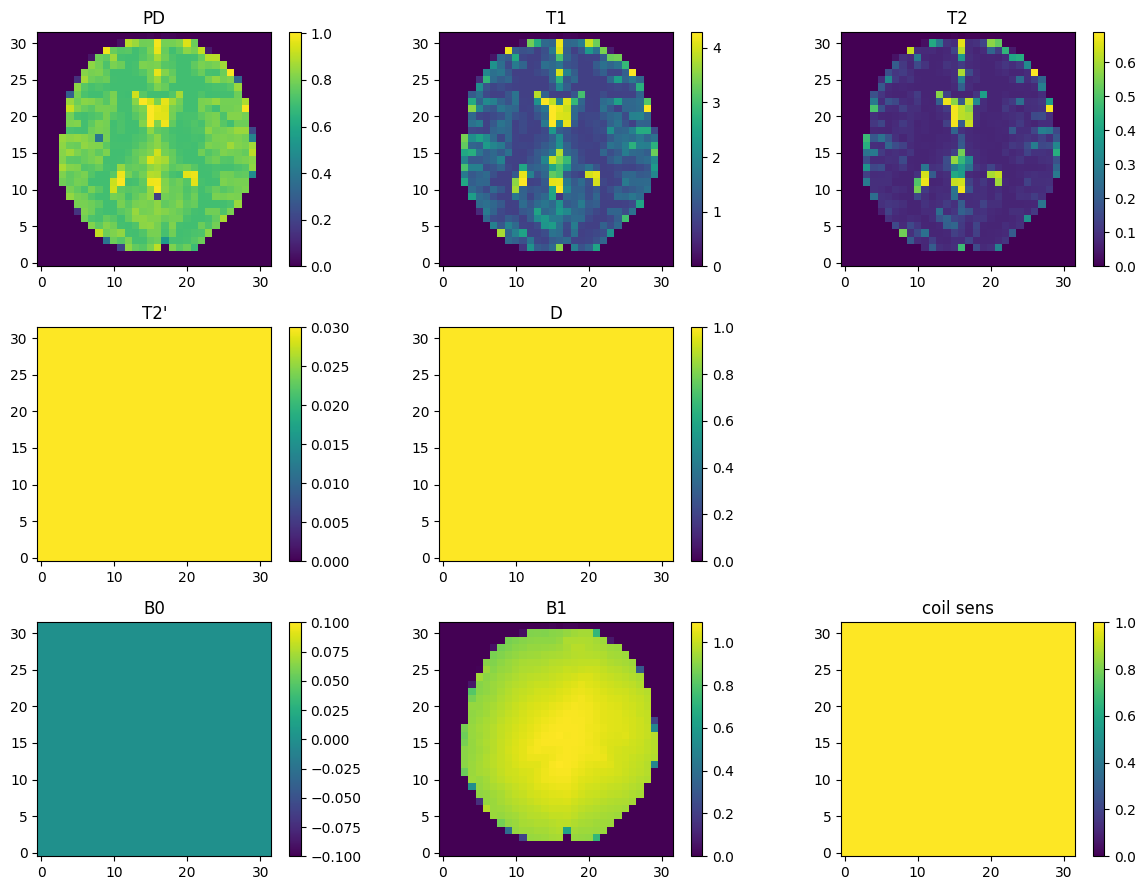

simulate (2D) 
C:\Users\perez\Desktop\masters\mri_research\code\python\mrf-masters\research_sequences_from_scratch\epi\epi_with_acceleration_and_half_fourier\epi_pypulseq_acceleration_R_1_half_fourier_False.seq


In [8]:
#@title 2. simulate for brain phantom
import MRzeroCore as mr0
import pypulseq as pp
import torch
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

seq = pp.Sequence()
seq.read(seq_file)

print('load phantom')
# %% S4: SETUP SPIN SYSTEM/object on which we can run the MR sequence external.seq from above
sz = [32, 32]
obj_p = mr0.VoxelGridPhantom.load_mat('numerical_brain_cropped.mat')
brain_phantom_res = 32 #@param {type:"slider", min:16, max:128, step:16}
obj_p = obj_p.interpolate(brain_phantom_res, brain_phantom_res, 1)
obj_p.B0[:] = 0
plot_phantom = True #@param {type:"boolean"}
if plot_phantom: obj_p.plot()

obj_p = obj_p.build()
print('simulate (2D) \n' + seq_file)
seq0 = mr0.Sequence.import_file(seq_file)
# seq0.plot_kspace_trajectory()

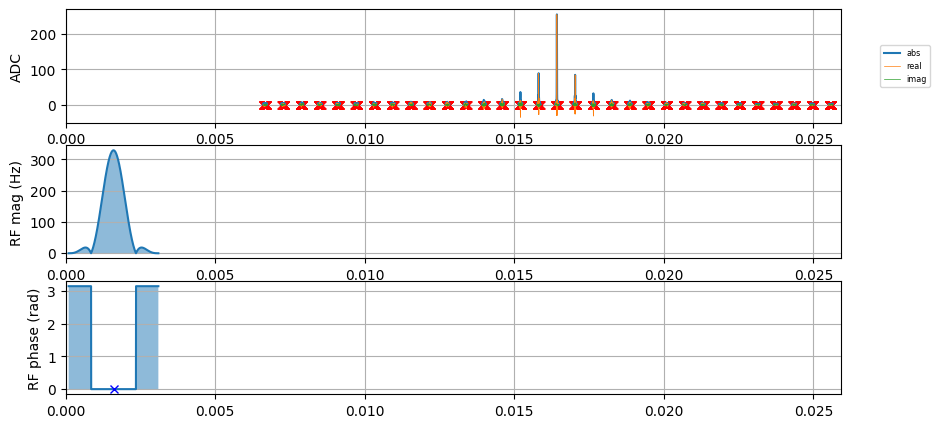

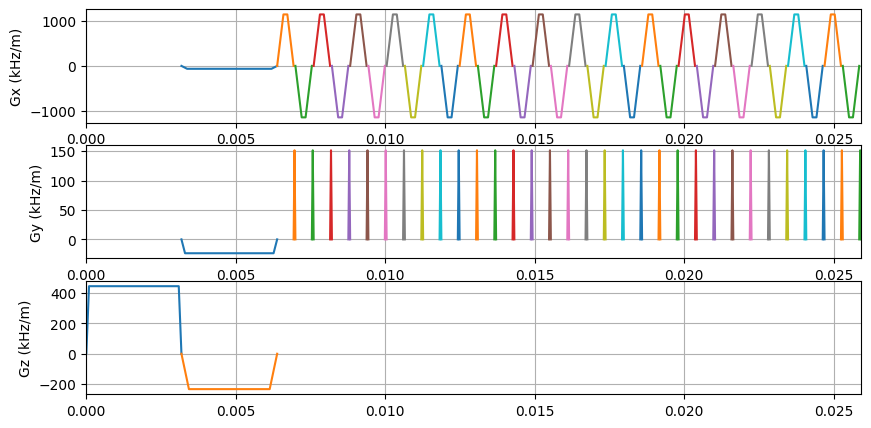

reconstruct and plot


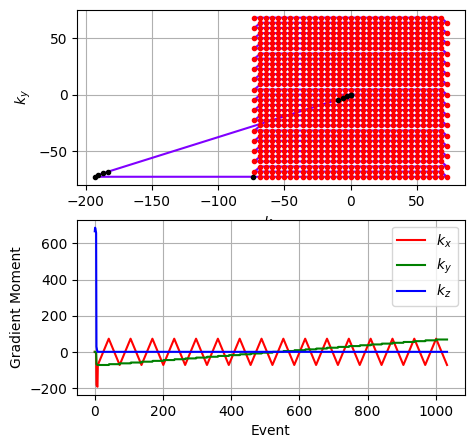

In [9]:
# Simulate the sequence
graph = mr0.compute_graph(seq0, obj_p, 200, 1e-3)
signal = mr0.execute_graph(graph, seq0, obj_p, print_progress=False)
#@title 3. Plot sequence and signal
sp_adc, t_adc = mr0.util.pulseq_plot(seq=seq,signal=signal.numpy())

# Unfortunately, we need to limit the resolution as reco_adjoint is very RAM-hungy
print('reconstruct and plot')
seq0.plot_kspace_trajectory()

In [10]:
reco = mr0.reco_adjoint(signal, seq0.get_kspace(), resolution=(256, 256, 1), FOV=(220e-3, 220e-3, 220e-3))

C:\Users\perez\Desktop\masters\mri_research\code\python\mrf-masters\.venv\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [113]:
# full_kspace = seq0.get_full_kspace()
# full_kspace[0].shape
# mask = seq0.get_contrast_mask(7)
# mask
# contrast_reco = reco(signal[mask], full_kspace[mask])

TypeError: only integer tensors of a single element can be converted to an index

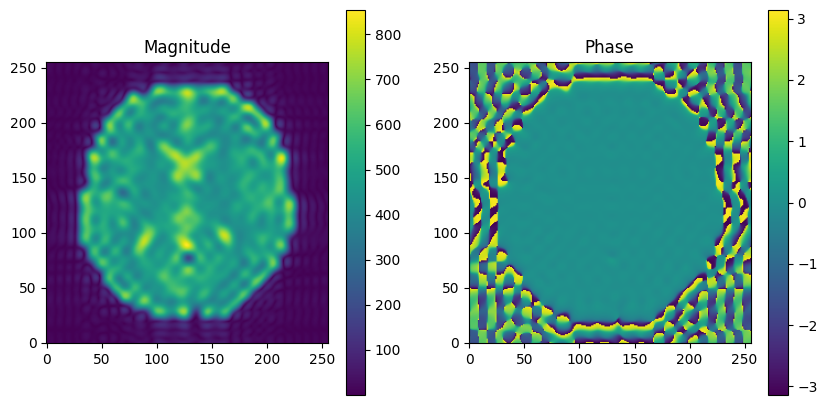

In [11]:
plt.figure()
plt.subplot(121)
plt.title("Magnitude")
plt.imshow(reco[:, :, 0].T.abs(), origin="lower")
plt.colorbar()
plt.subplot(122)
plt.title("Phase")
plt.imshow(reco[:, :, 0].T.angle(), origin="lower", vmin=-np.pi, vmax=np.pi)
plt.colorbar()
plt.show()